# Bank Marketing 

In [1]:
bank_additional_full_df<-read.csv('./data/bank-additional/bank-additional-full.csv',sep=';')
bank_additional_df=read.csv('./data/bank-additional/bank-additional.csv',sep=';')
bank_full_df=read.csv('./data/bank/bank-full.csv',sep=';')
bank_df=read.csv('./data/bank/bank.csv',sep=';')
dat=bank_additional_df

**查看列信息**

In [2]:
colnames(dat)
str(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

'data.frame':	4119 obs. of  21 variables:
 $ age           : int  30 39 25 38 47 32 32 41 31 35 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 2 8 8 8 1 8 1 3 8 2 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 3 2 2 2 3 3 2 1 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 3 4 4 3 7 7 7 7 6 3 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 2 1 2 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 3 1 3 2 3 1 3 3 1 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 2 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 2 2 1 1 1 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 5 5 8 10 10 8 8 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 1 2 3 2 2 4 3 ...
 $ duration      : int  487 346 227 17 58 128 290 44 68 170 ...
 $ campaign      : int  2 4 1 3 1 3 4 2 1 1 ...
 $ pdays         : int 

**是否存在空值**

In [3]:
indx<-apply(dat,2,function(x) any(is.na(x)))
indx
dat[1:5,1:12]
dat[1:5,13:21]
dim(dat)

age            job        marital      education        default 
         FALSE          FALSE          FALSE          FALSE          FALSE 
       housing           loan        contact          month    day_of_week 
         FALSE          FALSE          FALSE          FALSE          FALSE 
      duration       campaign          pdays       previous       poutcome 
         FALSE          FALSE          FALSE          FALSE          FALSE 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
         FALSE          FALSE          FALSE          FALSE          FALSE 
             y 
         FALSE

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2
39,services,single,high.school,no,no,no,telephone,may,fri,346,4
25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1
38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3
47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1


pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


[1] 4119   21

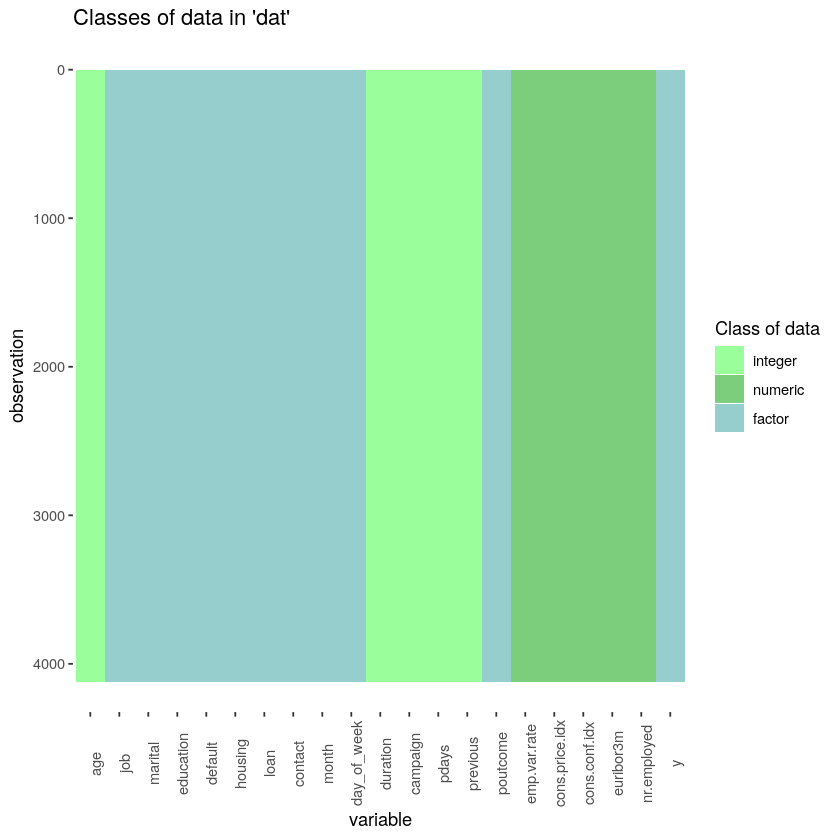

In [4]:
library(pastecs)
library(ggplot2)
library(dfexplore)
# stat.desc(bank_additional_full_df)
dfplot(dat)

[1] "yes" "no"

[1] "yes(10.95%)        " "no(89.05%)        "

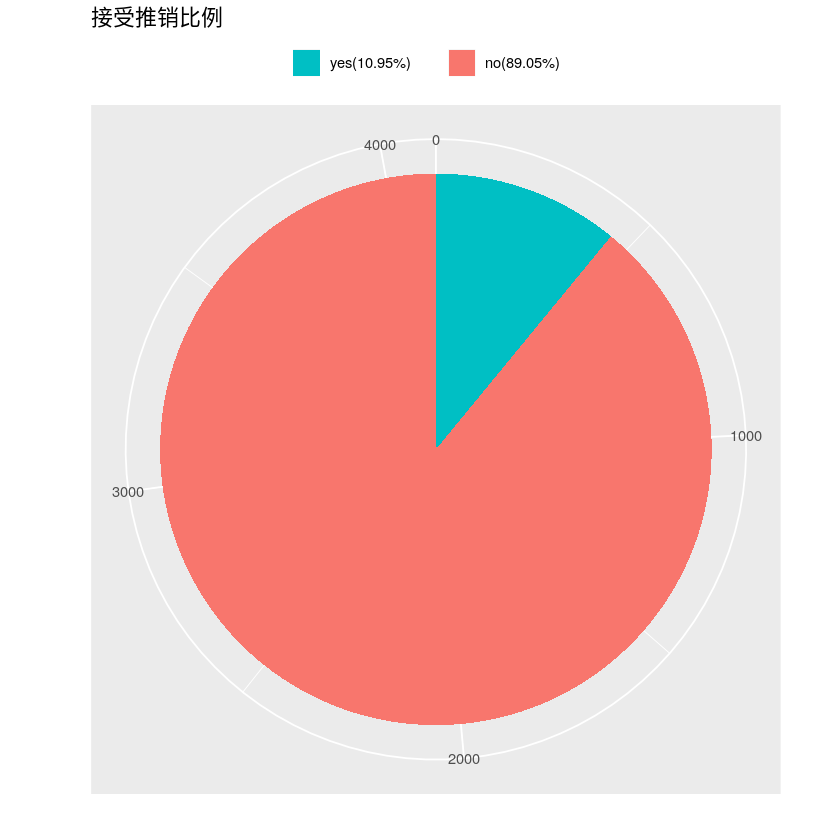

In [5]:
library(ggplot2)
dt=data.frame(A=c(sum(dat$y=='yes'),sum(dat$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
myLabel
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p+ggtitle('接受推销比例')


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


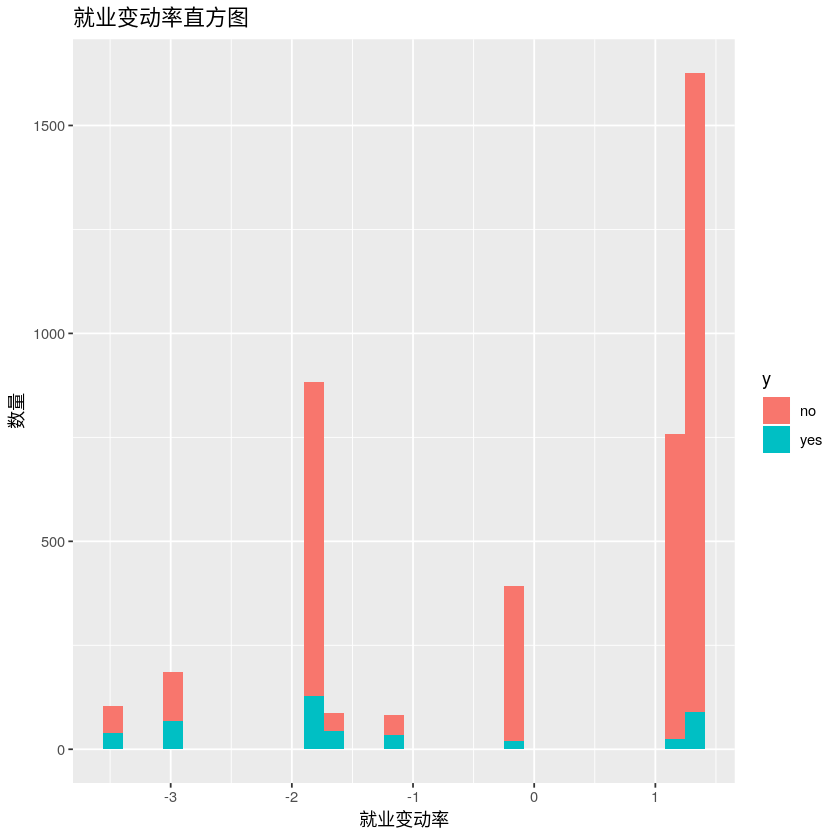

In [6]:
p<-ggplot(dat)+geom_histogram(aes(x=emp.var.rate,fill=y))
p+xlab('就业变动率')+ylab('数量')+ggtitle('就业变动率直方图')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


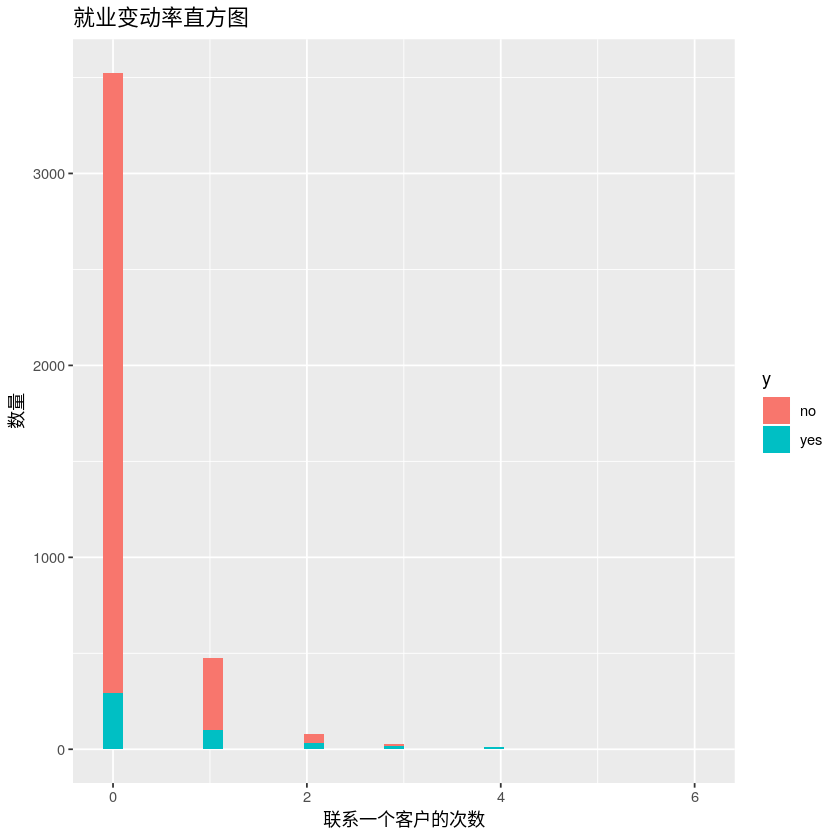

In [7]:
# previous属性直方图(联系次数)
# pdf('img/img01.pdf',width=4,height=4)
# theme(text = element_text(family='GB1'))
p<-ggplot(dat)+geom_histogram(aes(x=previous,fill=y))
p+xlab('联系一个客户的次数')+ylab('数量')+ggtitle('就业变动率直方图')
# +  theme(text = element_text(family='GB1'))
# dev.off()

Warning message:
“Ignoring unknown aesthetics: width”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


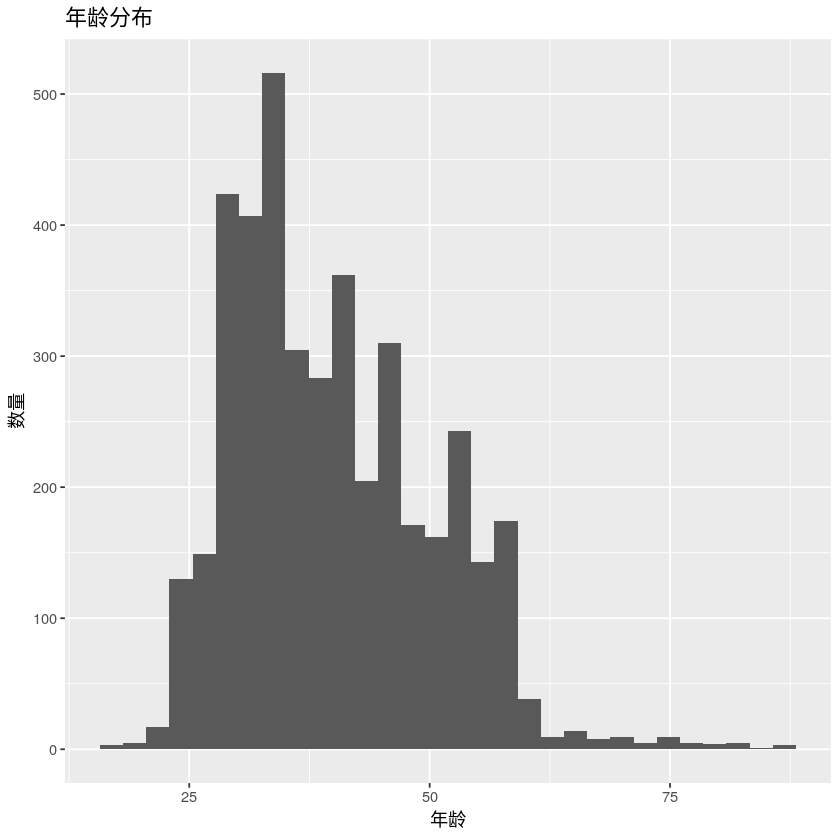

In [8]:
# previous属性直方图(联系次数)
# pdf('img/img01.pdf',width=4,height=4)
# theme(text = element_text(family='GB1'))
p<-ggplot(dat)+geom_histogram(aes(x=age,width=1))
p+xlab('年龄')+ylab('数量')+ggtitle('年龄分布')

nbr.val     nbr.null       nbr.na          min          max        range 
4.119000e+03 1.000000e+00 0.000000e+00 0.000000e+00 6.071667e+01 6.071667e+01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
1.762850e+04 3.016667e+00 4.279801e+00 6.614365e-02 1.296773e-01 1.802055e+01 
     std.dev     coef.var 
4.245062e+00 9.918831e-01

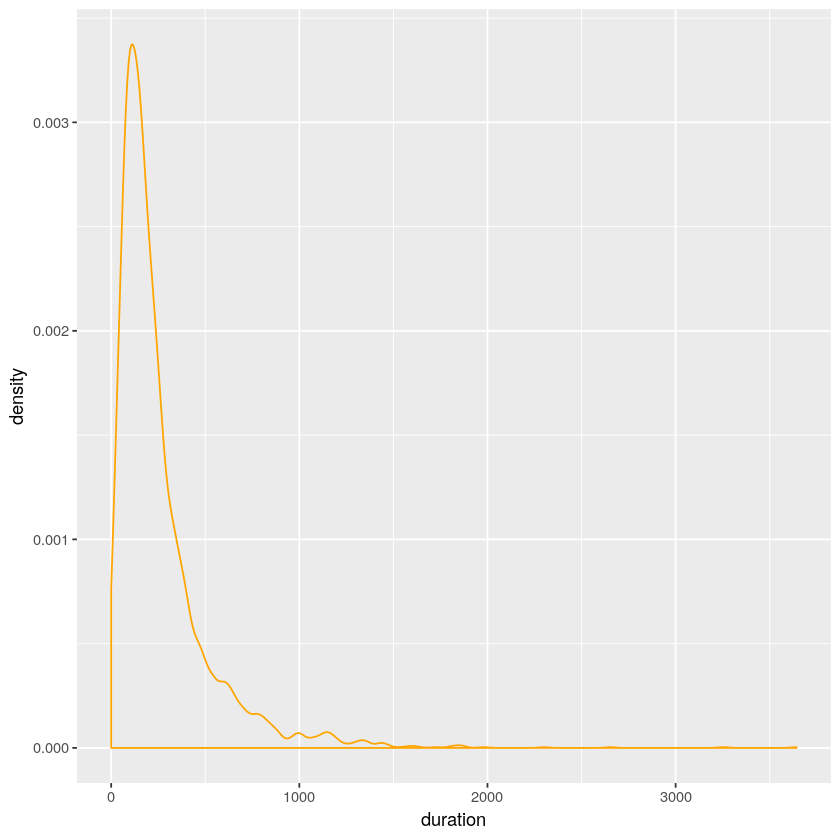

In [9]:
library(pastecs)
stat.desc(dat$duration/60)
ggplot(dat, aes(x=duration)) + geom_density(colour='orange')

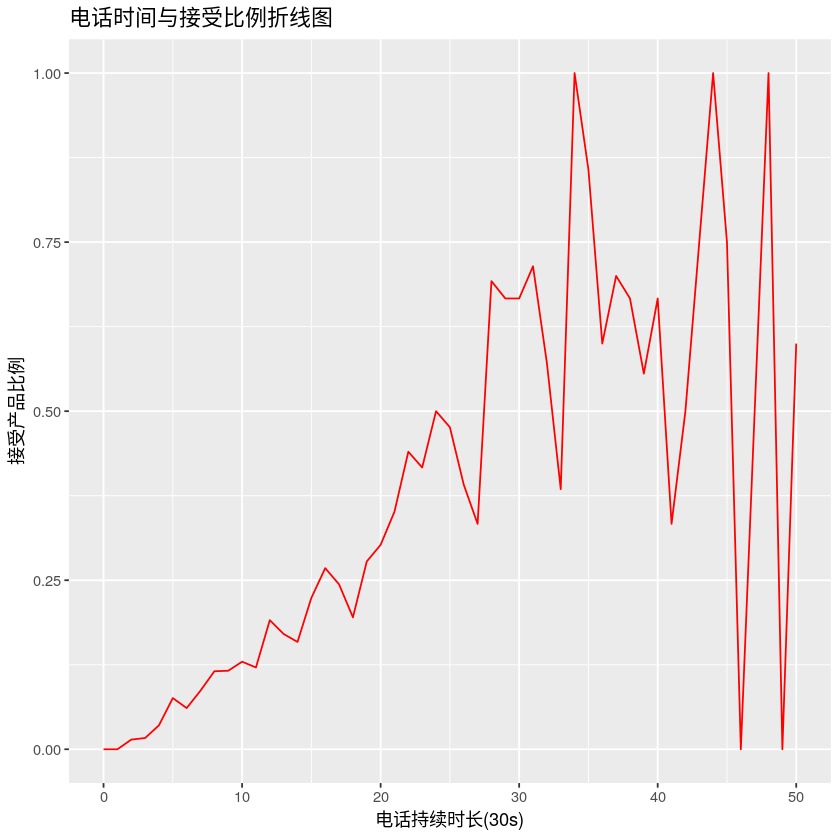

In [10]:
myfunc <- function(x){
  sum(x=='yes')/length(x)
}
dat2<-dat
dat2$duration[dat2$duration>1500]<-1500
dat2$duration<-dat2$duration%/%30
dur<-aggregate(dat2$y, by=list(dat2$duration),FUN=myfunc)
library(ggplot2)
# library(lubridate) 
p<-ggplot(data = dur, mapping = aes(x = Group.1, y = x, group = 1000)) + geom_line(
    colour='red')
p+xlab('电话持续时长(30s)')+ylab("接受产品比例")+ggtitle('电话时间与接受比例折线图')

In [11]:
colnames(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [12]:
dat_e<-dat[,-11]
colnames(dat_e)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "campaign"       "pdays"         
[13] "previous"       "poutcome"       "emp.var.rate"   "cons.price.idx"
[17] "cons.conf.idx"  "euribor3m"      "nr.employed"    "y"

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


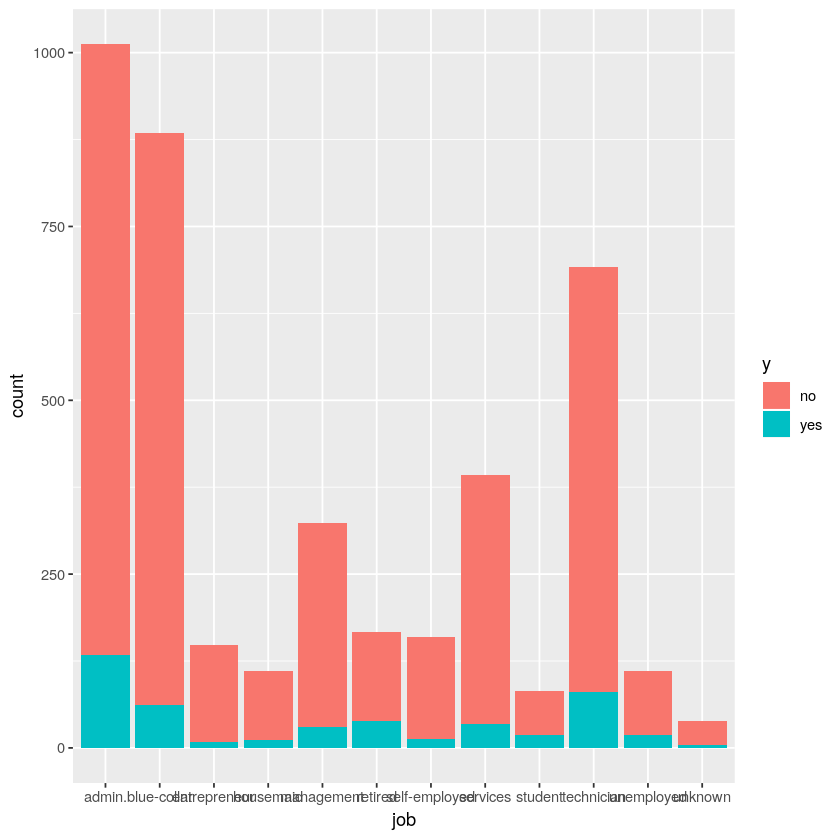

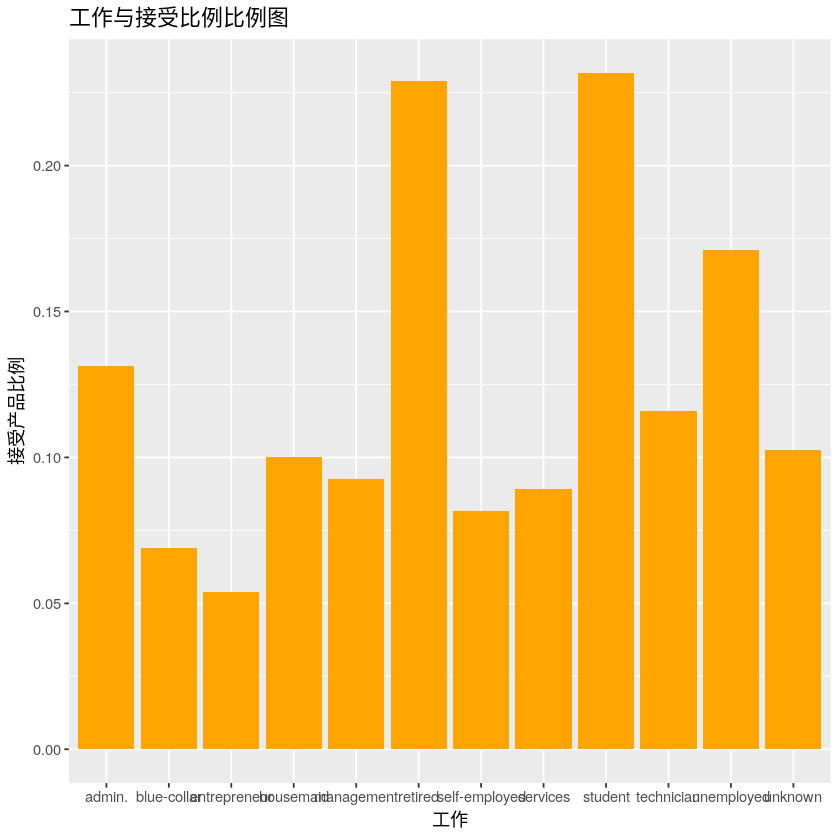

In [13]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
job<-aggregate(dat2$y, by=list(dat2$job),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=job,fill=y)) + geom_bar(stat="count")

p<-ggplot(data = job, mapping = aes(x = Group.1, y = x)) + geom_line(
    colour='red')+geom_bar(stat='identity',fill='orange')
p+xlab('工作')+ylab("接受产品比例")+ggtitle('工作与接受比例比例图')


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


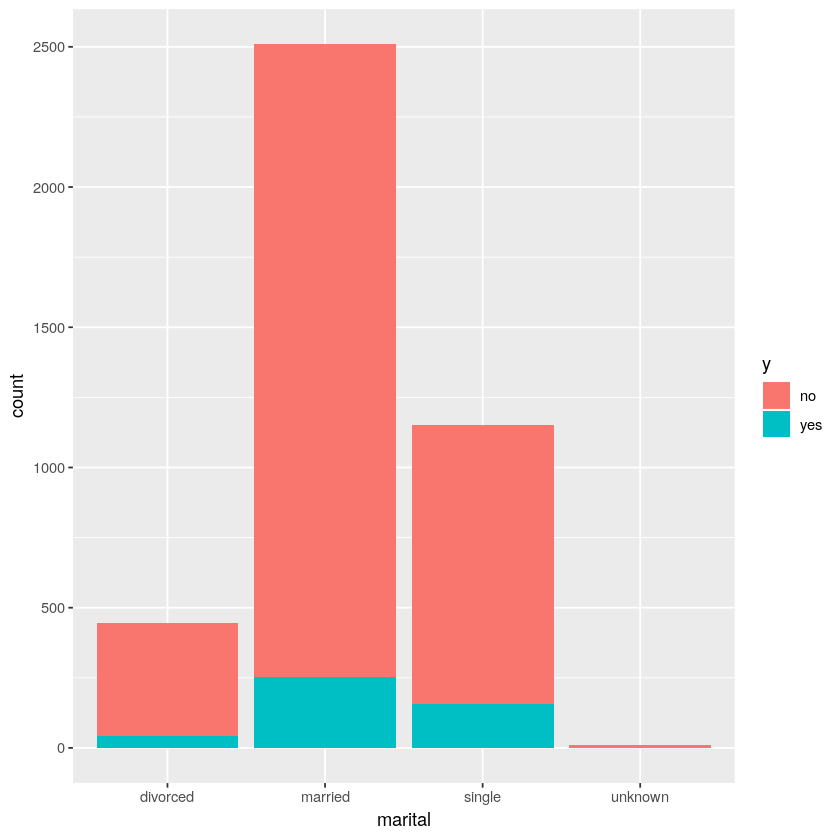

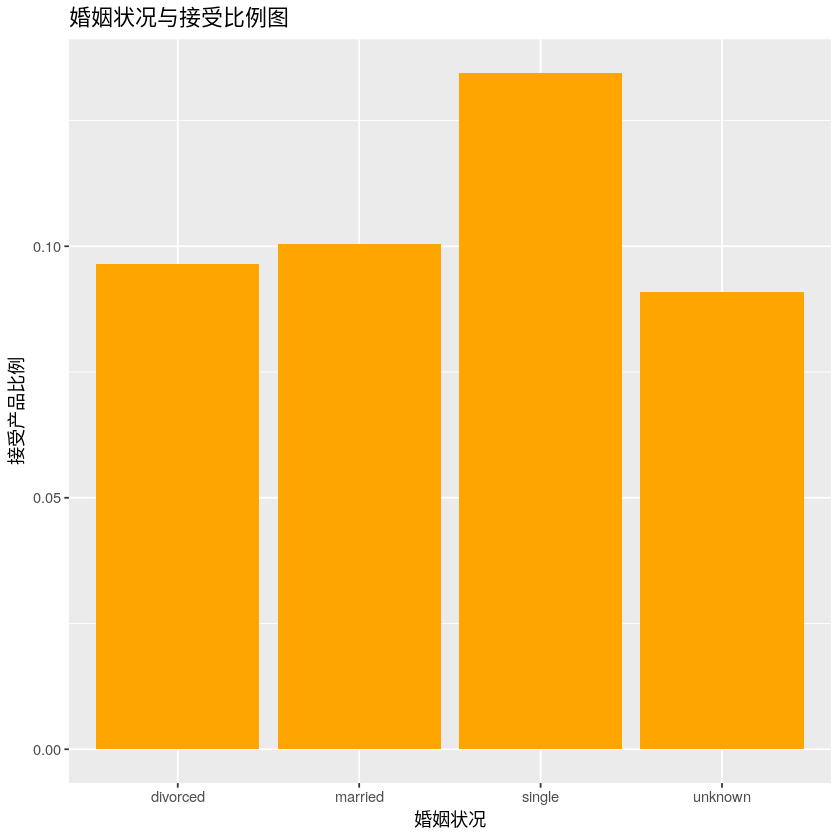

In [14]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
marital<-aggregate(dat2$y, by=list(dat2$marital),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=marital,fill=y)) + geom_bar(stat="count")

p<-ggplot(data = marital, mapping = aes(x = Group.1, y = x)) + geom_line(
    colour='red')+geom_bar(stat='identity',fill='orange')
p+xlab('婚姻状况')+ylab("接受产品比例")+ggtitle('婚姻状况与接受比例图')


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


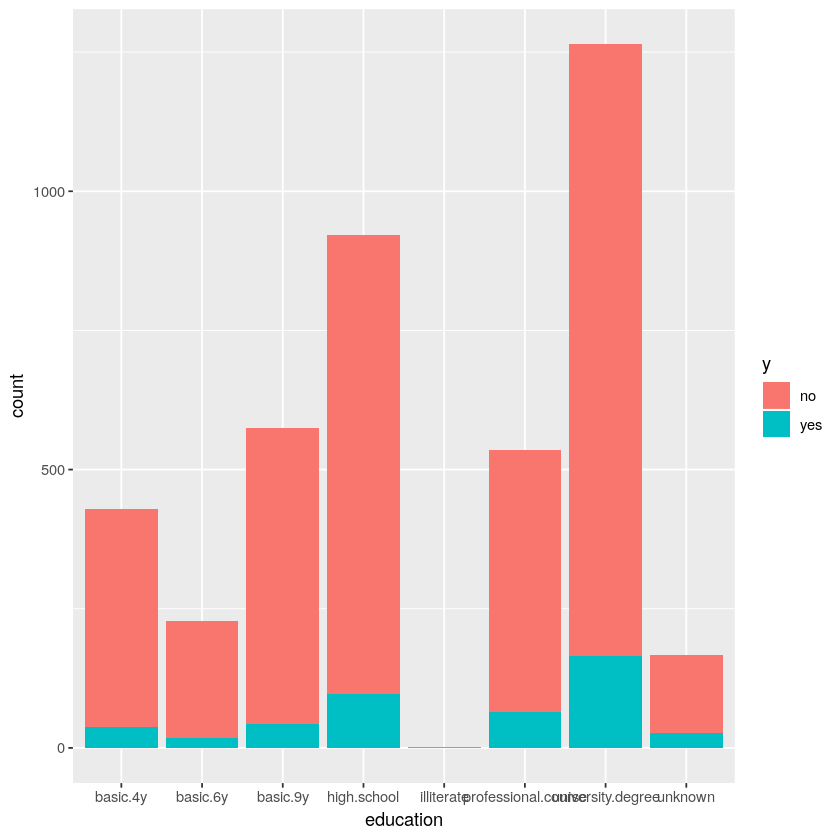

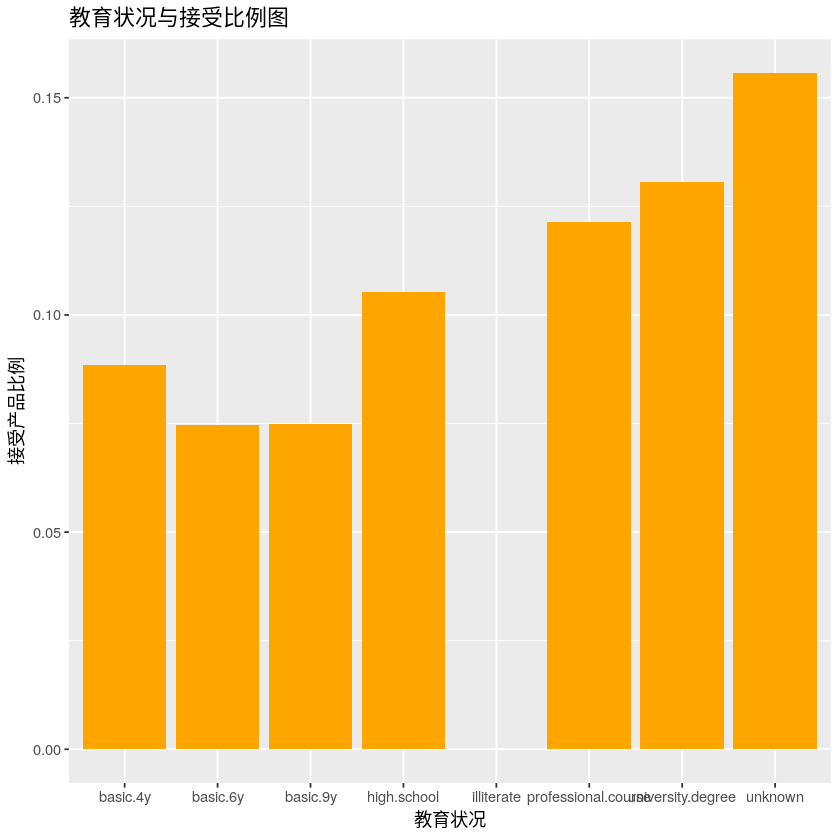

In [15]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
education<-aggregate(dat2$y, by=list(dat2$education),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=education,fill=y)) + geom_bar(stat="count")

p<-ggplot(data = education, mapping = aes(x = Group.1, y = x)) + geom_line(
    colour='red')+geom_bar(stat='identity',fill='orange')
p+xlab('教育状况')+ylab("接受产品比例")+ggtitle('教育状况与接受比例图')


In [16]:
colnames(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [17]:
dat_num<-dat[,c('y','age','duration','campaign','pdays','previous',
                'emp.var.rate','cons.price.idx','cons.conf.idx',
                'euribor3m','nr.employed')]
cor(dat_num[,-1])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0000000000,0.04129858,-0.014169150,-0.04342483,0.05093104,-0.01919176,-0.0004819963,0.098135199,-0.01503288,-0.04193615
duration,0.0412985752,1.00000000,-0.085348013,-0.04699821,0.02572418,-0.02884831,0.0166722553,-0.034744748,-0.03232899,-0.04421756
campaign,-0.0141691499,-0.08534801,1.000000000,0.05874163,-0.09148987,0.17607871,0.1450207792,0.007882403,0.15943531,0.16103686
pdays,-0.0434248272,-0.04699821,0.058741625,1.00000000,-0.58794114,0.27068388,0.0584719199,-0.092089964,0.30147800,0.38198311
previous,0.0509310356,0.02572418,-0.091489869,-0.58794114,1.00000000,-0.41523813,-0.1649219571,-0.051420341,-0.45885135,-0.51485341
emp.var.rate,-0.0191917634,-0.02884831,0.176078710,0.27068388,-0.41523813,1.00000000,0.7551545557,0.195021904,0.97030796,0.89717322
cons.price.idx,-0.0004819963,0.01667226,0.145020779,0.05847192,-0.16492196,0.75515456,1.0000000000,0.045834979,0.65715937,0.47255976
cons.conf.idx,0.0981351994,-0.03474475,0.007882403,-0.09208996,-0.05142034,0.19502190,0.0458349788,1.000000000,0.27659517,0.10705420
euribor3m,-0.0150328845,-0.03232899,0.159435309,0.30147800,-0.45885135,0.97030796,0.6571593688,0.276595165,1.00000000,0.94258928
nr.employed,-0.0419361520,-0.04421756,0.161036860,0.38198311,-0.51485341,0.89717322,0.4725597632,0.107054204,0.94258928,1.00000000


In [18]:
library(InformationValue)
dat_cat<-dat[,c('y','job','marital','education','default','housing',
               'loan','contact','month','day_of_week','poutcome')]
options(scipen = 999, digits = 4)

dat_cat$y<-as.vector(dat_cat$y)
dat_cat$y[dat_cat$y=='yes']<-'1'
dat_cat$y[dat_cat$y=='no']<-'0'
head(dat_cat)
i<-1
for(col in dat_cat[-1]){
    i<-i+1
    print(colnames(dat_cat)[i])
    print(IV(X=col,Y=dat_cat$y))
    cat('\n')
}
#     
# print("教育 IV")

y,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
0,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
0,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent
0,services,single,university.degree,no,no,no,cellular,sep,thu,failure


[1] "job"
[1] 0.1586
attr(,"howgood")
[1] "Highly Predictive"

[1] "marital"
[1] 0.02434
attr(,"howgood")
[1] "Not Predictive"

[1] "education"
[1] 0.06159
attr(,"howgood")
[1] "Somewhat Predictive"

[1] "default"
[1] 0.07701
attr(,"howgood")
[1] "Somewhat Predictive"

[1] "housing"
[1] 0.001732
attr(,"howgood")
[1] "Not Predictive"

[1] "loan"
[1] 0.003006
attr(,"howgood")
[1] "Not Predictive"

[1] "contact"
[1] 0.2325
attr(,"howgood")
[1] "Highly Predictive"

[1] "month"
[1] 0.463
attr(,"howgood")
[1] "Highly Predictive"

[1] "day_of_week"
[1] 0.001274
attr(,"howgood")
[1] "Not Predictive"

[1] "poutcome"
[1] 0.6016
attr(,"howgood")
[1] "Highly Predictive"



In [19]:
train<-data.frame(dat_cat,dat_num[,-1])
train$y<-as.factor(train$y)
head(train)
str(train)

y,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,30,487,2,999,0,-1.8,92.89,-46.2,1.313,5099
0,services,single,high.school,no,no,no,telephone,may,fri,⋯,39,346,4,999,0,1.1,93.99,-36.4,4.855,5191
0,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,25,227,1,999,0,1.4,94.47,-41.8,4.962,5228
0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,38,17,3,999,0,1.4,94.47,-41.8,4.959,5228
0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,47,58,1,999,0,-0.1,93.20,-42.0,4.191,5196
0,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,32,128,3,999,2,-1.1,94.20,-37.5,0.884,4964


'data.frame':	4119 obs. of  21 variables:
 $ y             : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 2 8 8 8 1 8 1 3 8 2 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 3 2 2 2 3 3 2 1 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 3 4 4 3 7 7 7 7 6 3 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 2 1 2 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 3 1 3 2 3 1 3 3 1 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 2 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 2 2 1 1 1 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 5 5 8 10 10 8 8 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 1 2 3 2 2 4 3 ...
 $ poutcome      : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ age           : int  30 39 25

In [20]:
library(lattice)
library(caret)
train2<-train
train2$y<-as.vector(train2$y)
train2$y[train2$y=="0"]<-'no'
train2$y[train2$y=="1"]<-'yes'
train2$y<-factor(train2$y,levels=c('yes','no'))
levels(train2$y)
train<-train2


Attaching package: ‘caret’

The following objects are masked from ‘package:InformationValue’:

    confusionMatrix, precision, sensitivity, specificity



[1] "yes" "no"

In [21]:
set.seed(233)
head(train)
train<-subset(train,select=(c(y,job,education,default,contact,month,poutcome,housing,
                            age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,
                            cons.conf.idx,euribor3m,nr.employed)))
head(train)

y,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,30,487,2,999,0,-1.8,92.89,-46.2,1.313,5099
no,services,single,high.school,no,no,no,telephone,may,fri,⋯,39,346,4,999,0,1.1,93.99,-36.4,4.855,5191
no,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,25,227,1,999,0,1.4,94.47,-41.8,4.962,5228
no,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,38,17,3,999,0,1.4,94.47,-41.8,4.959,5228
no,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,47,58,1,999,0,-0.1,93.20,-42.0,4.191,5196
no,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,32,128,3,999,2,-1.1,94.20,-37.5,0.884,4964


y,job,education,default,contact,month,poutcome,housing,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,blue-collar,basic.9y,no,cellular,may,nonexistent,yes,30,487,2,999,0,-1.8,92.89,-46.2,1.313,5099
no,services,high.school,no,telephone,may,nonexistent,no,39,346,4,999,0,1.1,93.99,-36.4,4.855,5191
no,services,high.school,no,telephone,jun,nonexistent,yes,25,227,1,999,0,1.4,94.47,-41.8,4.962,5228
no,services,basic.9y,no,telephone,jun,nonexistent,unknown,38,17,3,999,0,1.4,94.47,-41.8,4.959,5228
no,admin.,university.degree,no,cellular,nov,nonexistent,yes,47,58,1,999,0,-0.1,93.20,-42.0,4.191,5196
no,services,university.degree,no,cellular,sep,failure,no,32,128,3,999,2,-1.1,94.20,-37.5,0.884,4964


In [22]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
 
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
 
  numPlots = length(plots)
 
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
 
 if (numPlots==1) {
    print(plots[[1]])
 
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
 
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
 
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


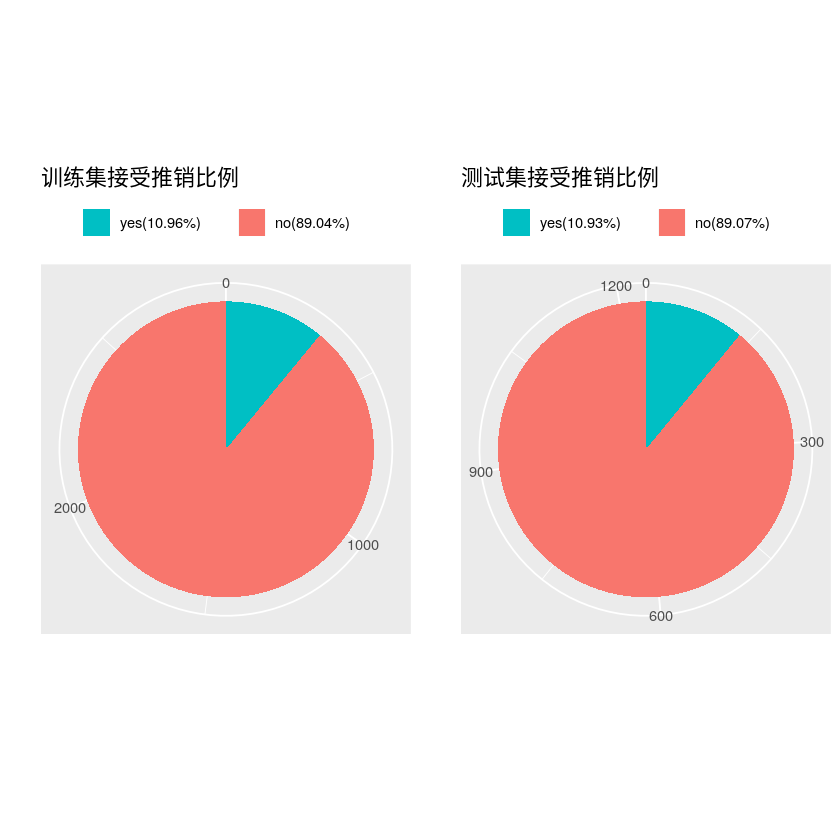

In [23]:
# 训练集分割
partition_indexed<-createDataPartition(train$y,times=1,p=.7,list=FALSE)
bank.train<-train[partition_indexed,]
bank.test<-train[-partition_indexed,]

library(ggplot2)
dt<-data.frame(A=c(sum(bank.train$y=='yes'),sum(bank.train$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p1<-p+ggtitle('训练集接受推销比例')

dt<-data.frame(A=c(sum(bank.test$y=='yes'),sum(bank.test$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p2<-p+ggtitle('测试集接受推销比例')
multiplot(p1, p2,cols=2)

## 开始训练

### 结果存储声明

In [24]:
matrix1 <- data.frame(model=0,Accuracy=0,Sensitivity=0,Precision=0,Specificity=0,Recall=0,F1=0,Kappa=0,TP=0,FN=0,FP=0,TF=0)
matrix1 <- matrix1[-1,]
library(miscTools)
saveMatrix1<-function(mat,label){
    df<-data.frame(mat[2])
    df3<-data.frame(mat[3])
    acc<-df3[1,1]
    df4<-data.frame(mat[4])
    sen<-df4[1,1]
    spe<-df4[2,1]
    pre<-df4[5,1]
    rec<-df4[6,1]
    f1<-df4[7,1]
    kappa<-df3[2,1]
    line<-data.frame(model=label,Accuracy=acc,Sensitivity=sen,Precesion=pre,Specificity=spe,Recall=rec,F1=f1,
                     Kappa=kappa,TP=df[1,3],FN=df[2,3],FP=df[3,3],TF=df[4,3])
    return(line)
}

matrix2 <- data.frame(model=0,Accuracy=0,Sensitivity=0,Precision=0,Specificity=0,Recall=0,F1=0,Kappa=0,TP=0,FN=0,FP=0,TF=0)
matrix2 <- matrix2[-1,]
library(miscTools)
saveMatrix2<-function(mat,label){
    df<-data.frame(mat[2])
    df3<-data.frame(mat[3])
    acc<-df3[1,1]
    df4<-data.frame(mat[4])
    sen<-df4[1,1]
    spe<-df4[2,1]
    pre<-df4[5,1]
    rec<-df4[6,1]
    f1<-df4[7,1]
    kappa<-df3[2,1]
    line<-data.frame(model=label,Accuracy=acc,Sensitivity=sen,Precesion=pre,Specificity=spe,Recall=rec,F1=f1,
                     Kappa=kappa,TP=df[1,3],FN=df[2,3],FP=df[3,3],TF=df[4,3])
    return(line)
}

### 逻辑回归

In [25]:
# train with logistic regression
mod_fit<-train(y~.,data=bank.train,
              method='LogitBoost',family='binomial')
predictions<-predict(mod_fit,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"逻辑回归"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   55   13
       no    80 1087
                                          
               Accuracy : 0.925           
                 95% CI : (0.909, 0.939)  
    No Information Rate : 0.891           
    P-Value [Acc > NIR] : 0.00003601184575
                                          
                  Kappa : 0.506           
                                          
 Mcnemar's Test P-Value : 0.00000000000771
                                          
            Sensitivity : 0.4074          
            Specificity : 0.9882          
         Pos Pred Value : 0.8088          
         Neg Pred Value : 0.9314          
             Prevalence : 0.1093          
         Detection Rate : 0.0445          
   Detection Prevalence : 0.0551          
      Balanced Accuracy : 0.6978          
                                          
       'Positive' Class : yes             
                        

In [26]:
# cut duration
bank.train2<-bank.train
bank.test2<-bank.test
bank.train2$duration<-NULL
bank.test2$duration<-NULL
mod_fit<-train(y~.,data=bank.train2,
              method='LogitBoost',family='binomial')
predictions<-predict(mod_fit,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"逻辑回归"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   27   18
       no   108 1082
                                             
               Accuracy : 0.898              
                 95% CI : (0.88, 0.914)      
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.221              
                                             
                  Kappa : 0.26               
                                             
 Mcnemar's Test P-Value : 0.00000000000000221
                                             
            Sensitivity : 0.2000             
            Specificity : 0.9836             
         Pos Pred Value : 0.6000             
         Neg Pred Value : 0.9092             
             Prevalence : 0.1093             
         Detection Rate : 0.0219             
   Detection Prevalence : 0.0364             
      Balanced Accuracy : 0.5918             
                                             
       'Po

## SVM
kernel	
the kernel used in training and predicting. You might consider changing some of the following parameters, depending on the kernel type.

linear:

𝑢′∗𝑣

polynomial:

(𝑔𝑎𝑚𝑚𝑎∗𝑢′∗𝑣+𝑐𝑜𝑒𝑓0)𝑑𝑒𝑔𝑟𝑒𝑒

radial basis:

𝑒𝑥𝑝(−𝑔𝑎𝑚𝑚𝑎∗|𝑢−𝑣|2)

sigmoid:

𝑡𝑎𝑛ℎ(𝑔𝑎𝑚𝑚𝑎∗𝑢′∗𝑣+𝑐𝑜𝑒𝑓0)

In [27]:
# library(e1071)
# tuned<-tune(svm,y~.,
#            data=bank.train,
#            kernel='polynomial',
#            ranges=list(cost=c(0.001,0.01,0.1,1,10,100)))
# summary(tuned)

In [28]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train,kernel='polynomial',cost=100,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"SVM-多项式核函数"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   64   28
       no    71 1072
                                        
               Accuracy : 0.92          
                 95% CI : (0.903, 0.934)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.000381      
                                        
                  Kappa : 0.521         
                                        
 Mcnemar's Test P-Value : 0.0000243     
                                        
            Sensitivity : 0.4741        
            Specificity : 0.9745        
         Pos Pred Value : 0.6957        
         Neg Pred Value : 0.9379        
             Prevalence : 0.1093        
         Detection Rate : 0.0518        
   Detection Prevalence : 0.0745        
      Balanced Accuracy : 0.7243        
                                        
       'Positive' Class : yes           
                                        

### SVM-linear

In [29]:
# tuned<-tune(svm,y~.,
#            data=bank.train,
#            kernel='linear',
#            ranges=list(cost=c(0.001,0.01,0.1,1,10,100)))
# summary(tuned)

In [30]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train,kernel='linear',cost=.1,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"SVM-线性核函数"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   59   24
       no    76 1076
                                        
               Accuracy : 0.919         
                 95% CI : (0.902, 0.934)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.000545      
                                        
                  Kappa : 0.5           
                                        
 Mcnemar's Test P-Value : 0.00000034    
                                        
            Sensitivity : 0.4370        
            Specificity : 0.9782        
         Pos Pred Value : 0.7108        
         Neg Pred Value : 0.9340        
             Prevalence : 0.1093        
         Detection Rate : 0.0478        
   Detection Prevalence : 0.0672        
      Balanced Accuracy : 0.7076        
                                        
       'Positive' Class : yes           
                                        

### SVM-Drop duration Linear

In [31]:
# tuned<-tune(svm,y~.,
#            data=bank.train2,
#            kernel='linear',
#            ranges=list(cost=c(0.01,0.1,1,10)))
# summary(tuned)

In [32]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train2,kernel='linear',cost=1,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test2[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"SVM-线性核函数"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   24   10
       no   111 1090
                                             
               Accuracy : 0.902              
                 95% CI : (0.884, 0.918)     
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.108              
                                             
                  Kappa : 0.251              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.1778             
            Specificity : 0.9909             
         Pos Pred Value : 0.7059             
         Neg Pred Value : 0.9076             
             Prevalence : 0.1093             
         Detection Rate : 0.0194             
   Detection Prevalence : 0.0275             
      Balanced Accuracy : 0.5843             
                                             
       'Po

### SVM-Drop duration Polynomial

In [33]:
# tuned<-tune(svm,y~.,
#            data=bank.train2,
#            kernel='polynomial',
#            ranges=list(cost=c(0.01,0.1,1,10)))
# summary(tuned)

In [34]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train2,kernel='polynomial',cost=.001,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test2[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"SVM-多项式核函数"))

Confusion Matrix and Statistics

          Reference
Prediction yes  no
       yes  45 102
       no   90 998
                                        
               Accuracy : 0.845         
                 95% CI : (0.823, 0.864)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 1.000         
                                        
                  Kappa : 0.232         
                                        
 Mcnemar's Test P-Value : 0.427         
                                        
            Sensitivity : 0.3333        
            Specificity : 0.9073        
         Pos Pred Value : 0.3061        
         Neg Pred Value : 0.9173        
             Prevalence : 0.1093        
         Detection Rate : 0.0364        
   Detection Prevalence : 0.1190        
      Balanced Accuracy : 0.6203        
                                        
       'Positive' Class : yes           
                                        

In [35]:
head(bank.train2)

y,job,education,default,contact,month,poutcome,housing,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,blue-collar,basic.9y,no,cellular,may,nonexistent,yes,30,2,999,0,-1.8,92.89,-46.2,1.313,5099
no,services,high.school,no,telephone,may,nonexistent,no,39,4,999,0,1.1,93.99,-36.4,4.855,5191
no,services,high.school,no,telephone,jun,nonexistent,yes,25,1,999,0,1.4,94.47,-41.8,4.962,5228
no,services,basic.9y,no,telephone,jun,nonexistent,unknown,38,3,999,0,1.4,94.47,-41.8,4.959,5228
no,admin.,university.degree,no,cellular,nov,nonexistent,yes,47,1,999,0,-0.1,93.20,-42.0,4.191,5196
no,services,university.degree,no,cellular,sep,failure,no,32,3,999,2,-1.1,94.20,-37.5,0.884,4964


### 分拆

In [36]:
dummy<-dummyVars(~.,data=bank.train2[,-1])
dummy_train<-predict(dummy,bank.train2[,-1])
dummy_train<-data.frame(dummy_train)
dummy_train$y<-factor(bank.train2$y,levels=c('yes','no'))

dummy<-dummyVars(~.,data=bank.test2[,-1])
dummy_test<-predict(dummy,bank.test2[,-1])
dummy_test<-data.frame(dummy_test)
dummy_test$y<-factor(bank.test2$y,levels=c('yes','no'))

library('e1071')
svmfit<-svm(y~.,data=dummy_train,kernel='polynomial',cost=.001,scale=FALSE)
# summary(svmfit)
n<-length(dummy_test)
predictions.svm<-predict(svmfit,dummy_test[,1:(n-1)],type='class')
confusionMatrix(predictions.svm,dummy_test[,n])

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   23   14
       no   112 1086
                                             
               Accuracy : 0.898              
                 95% CI : (0.88, 0.914)      
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.221              
                                             
                  Kappa : 0.231              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.1704             
            Specificity : 0.9873             
         Pos Pred Value : 0.6216             
         Neg Pred Value : 0.9065             
             Prevalence : 0.1093             
         Detection Rate : 0.0186             
   Detection Prevalence : 0.0300             
      Balanced Accuracy : 0.5788             
                                             
       'Po

### 神经网络
有duration-nnet

In [37]:
# nnet
nnfit<-train(y~.,data=bank.train,method='nnet',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"神经网络-nnet"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   65   36
       no    70 1064
                                        
               Accuracy : 0.914         
                 95% CI : (0.897, 0.929)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.00373       
                                        
                  Kappa : 0.504         
                                        
 Mcnemar's Test P-Value : 0.00135       
                                        
            Sensitivity : 0.4815        
            Specificity : 0.9673        
         Pos Pred Value : 0.6436        
         Neg Pred Value : 0.9383        
             Prevalence : 0.1093        
         Detection Rate : 0.0526        
   Detection Prevalence : 0.0818        
      Balanced Accuracy : 0.7244        
                                        
       'Positive' Class : yes           
                                        

没有duration

In [38]:
# nnet
nnfit<-train(y~.,data=bank.train2,method='nnet',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"神经网络-nnet"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   36   23
       no    99 1077
                                         
               Accuracy : 0.901          
                 95% CI : (0.883, 0.917) 
    No Information Rate : 0.891          
    P-Value [Acc > NIR] : 0.126          
                                         
                  Kappa : 0.326          
                                         
 Mcnemar's Test P-Value : 0.0000000000112
                                         
            Sensitivity : 0.2667         
            Specificity : 0.9791         
         Pos Pred Value : 0.6102         
         Neg Pred Value : 0.9158         
             Prevalence : 0.1093         
         Detection Rate : 0.0291         
   Detection Prevalence : 0.0478         
      Balanced Accuracy : 0.6229         
                                         
       'Positive' Class : yes            
                                         

### multinom
有duration

In [44]:
# nnet
nnfit<-train(y~.,data=bank.train,method='multinom',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,'神经网络-multinom'))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   63   23
       no    72 1077
                                        
               Accuracy : 0.923         
                 95% CI : (0.907, 0.937)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.000082575   
                                        
                  Kappa : 0.53          
                                        
 Mcnemar's Test P-Value : 0.000000845   
                                        
            Sensitivity : 0.4667        
            Specificity : 0.9791        
         Pos Pred Value : 0.7326        
         Neg Pred Value : 0.9373        
             Prevalence : 0.1093        
         Detection Rate : 0.0510        
   Detection Prevalence : 0.0696        
      Balanced Accuracy : 0.7229        
                                        
       'Positive' Class : yes           
                                        

### 没有duration

In [45]:
# multinom
nnfit<-train(y~.,data=bank.train2,method='multinom',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"神经网络-multinom"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   24   14
       no   111 1086
                                             
               Accuracy : 0.899              
                 95% CI : (0.881, 0.915)     
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.194              
                                             
                  Kappa : 0.241              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.1778             
            Specificity : 0.9873             
         Pos Pred Value : 0.6316             
         Neg Pred Value : 0.9073             
             Prevalence : 0.1093             
         Detection Rate : 0.0194             
   Detection Prevalence : 0.0308             
      Balanced Accuracy : 0.5825             
                                             
       'Po

### 条件推理树

Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


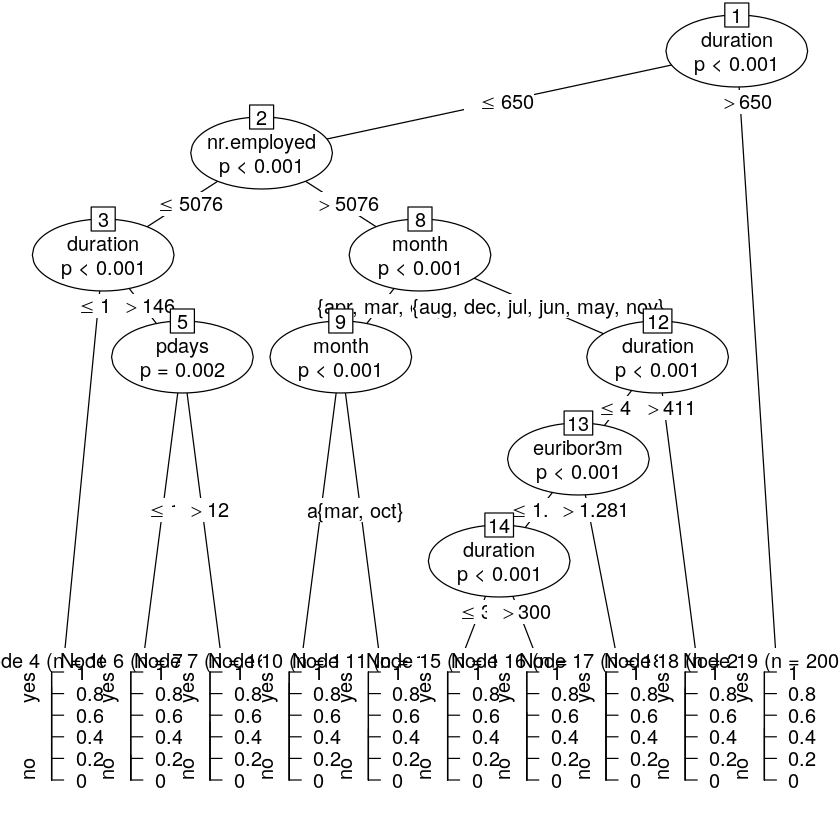

In [46]:
library(mvtnorm)
library(party)
fit_tree<-ctree(y~.,data=bank.train)
plot(fit_tree)

## 分类决策树
有duration

In [47]:
library(rpart)
tree_fit<-rpart(y~.,data=bank.train,method = 'class')
fit.pruned<-prune(tree_fit,cp=tree_fit$cptable[which.min(tree_fit$cptable[,'xerror']),'CP'])
predictions<-predict(fit.pruned,bank.test,type='class')
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"分类决策树"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   51   20
       no    84 1080
                                        
               Accuracy : 0.916         
                 95% CI : (0.899, 0.931)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.00204       
                                        
                  Kappa : 0.454         
                                        
 Mcnemar's Test P-Value : 0.000000000651
                                        
            Sensitivity : 0.3778        
            Specificity : 0.9818        
         Pos Pred Value : 0.7183        
         Neg Pred Value : 0.9278        
             Prevalence : 0.1093        
         Detection Rate : 0.0413        
   Detection Prevalence : 0.0575        
      Balanced Accuracy : 0.6798        
                                        
       'Positive' Class : yes           
                                        

无duration

In [48]:
library(rpart)
tree_fit2<-rpart(y~.,data=bank.train2,method = 'class')
fit.pruned<-prune(tree_fit2,cp=tree_fit2$cptable[which.min(tree_fit2$cptable[,'xerror']),'CP'])
predictions<-predict(fit.pruned,bank.test2,type='class')
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"分类决策树"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   21    9
       no   114 1091
                                             
               Accuracy : 0.9                
                 95% CI : (0.882, 0.917)     
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.147              
                                             
                  Kappa : 0.224              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.1556             
            Specificity : 0.9918             
         Pos Pred Value : 0.7000             
         Neg Pred Value : 0.9054             
             Prevalence : 0.1093             
         Detection Rate : 0.0170             
   Detection Prevalence : 0.0243             
      Balanced Accuracy : 0.5737             
                                             
       'Po

### 分类条件推理树
有duration

In [49]:
fit.ctree<-ctree(y~.,data=bank.train)
predictions<-predict(fit.ctree,bank.test)
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"分类条件推理树"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   68   42
       no    67 1058
                                        
               Accuracy : 0.912         
                 95% CI : (0.895, 0.927)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.00858       
                                        
                  Kappa : 0.507         
                                        
 Mcnemar's Test P-Value : 0.02152       
                                        
            Sensitivity : 0.5037        
            Specificity : 0.9618        
         Pos Pred Value : 0.6182        
         Neg Pred Value : 0.9404        
             Prevalence : 0.1093        
         Detection Rate : 0.0551        
   Detection Prevalence : 0.0891        
      Balanced Accuracy : 0.7328        
                                        
       'Positive' Class : yes           
                                        

无duration

In [50]:
fit.ctree<-ctree(y~.,data=bank.train2)
predictions<-predict(fit.ctree,bank.test2)
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"分类条件推理树"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   21    9
       no   114 1091
                                             
               Accuracy : 0.9                
                 95% CI : (0.882, 0.917)     
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.147              
                                             
                  Kappa : 0.224              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.1556             
            Specificity : 0.9918             
         Pos Pred Value : 0.7000             
         Neg Pred Value : 0.9054             
             Prevalence : 0.1093             
         Detection Rate : 0.0170             
   Detection Prevalence : 0.0243             
      Balanced Accuracy : 0.5737             
                                             
       'Po

### 随机森林
有duration

In [51]:
library(randomForest, warn.conflicts = FALSE)
fit.rf<-randomForest(y~.,data=bank.train)
predictions<-predict(fit.rf,bank.test)
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"随机森林"))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   52   18
       no    83 1082
                                        
               Accuracy : 0.918         
                 95% CI : (0.902, 0.933)
    No Information Rate : 0.891         
    P-Value [Acc > NIR] : 0.00077       
                                        
                  Kappa : 0.468         
                                        
 Mcnemar's Test P-Value : 0.000000000191
                                        
            Sensitivity : 0.3852        
            Specificity : 0.9836        
         Pos Pred Value : 0.7429        
         Neg Pred Value : 0.9288        
             Prevalence : 0.1093        
         Detection Rate : 0.0421        
   Detection Prevalence : 0.0567        
      Balanced Accuracy : 0.6844        
                                        
       'Positive' Class : yes           
                                        

无duration

In [52]:
library(randomForest, warn.conflicts = FALSE)
fit.rf<-randomForest(y~.,data=bank.train2)
predictions<-predict(fit.rf,bank.test2)
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"随机森林"))

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes   28   17
       no   107 1083
                                             
               Accuracy : 0.9                
                 95% CI : (0.881, 0.916)     
    No Information Rate : 0.891              
    P-Value [Acc > NIR] : 0.169              
                                             
                  Kappa : 0.271              
                                             
 Mcnemar's Test P-Value : 0.00000000000000132
                                             
            Sensitivity : 0.2074             
            Specificity : 0.9845             
         Pos Pred Value : 0.6222             
         Neg Pred Value : 0.9101             
             Prevalence : 0.1093             
         Detection Rate : 0.0227             
   Detection Prevalence : 0.0364             
      Balanced Accuracy : 0.5960             
                                             
       'Po

In [53]:
matrix1
matrix2

model,Accuracy,Sensitivity,Precesion,Specificity,Recall,F1,Kappa,TP,FN,FP,TF
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
逻辑回归,0.9247,0.4074,0.8088,0.9882,0.4074,0.5419,0.5057,55,80,13,1087
SVM-多项式核函数,0.9198,0.4741,0.6957,0.9745,0.4741,0.5639,0.5215,64,71,28,1072
SVM-线性核函数,0.9190,0.4370,0.7108,0.9782,0.4370,0.5413,0.4996,59,76,24,1076
神经网络-nnet,0.9142,0.4815,0.6436,0.9673,0.4815,0.5508,0.5045,65,70,36,1064
神经网络-multinom,0.9231,0.4667,0.7326,0.9791,0.4667,0.5701,0.5302,63,72,23,1077
分类决策树,0.9158,0.3778,0.7183,0.9818,0.3778,0.4951,0.4540,51,84,20,1080
分类条件推理树,0.9117,0.5037,0.6182,0.9618,0.5037,0.5551,0.5067,68,67,42,1058
随机森林,0.9182,0.3852,0.7429,0.9836,0.3852,0.5073,0.4676,52,83,18,1082


model,Accuracy,Sensitivity,Precesion,Specificity,Recall,F1,Kappa,TP,FN,FP,TF
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
逻辑回归,0.8980,0.2000,0.6000,0.9836,0.2000,0.3000,0.2595,27,108,18,1082
SVM-线性核函数,0.9020,0.1778,0.7059,0.9909,0.1778,0.2840,0.2511,24,111,10,1090
SVM-多项式核函数,0.8445,0.3333,0.3061,0.9073,0.3333,0.3191,0.2316,45,90,102,998
神经网络-nnet,0.9012,0.2667,0.6102,0.9791,0.2667,0.3711,0.3263,36,99,23,1077
神经网络-multinom,0.8988,0.1778,0.6316,0.9873,0.1778,0.2775,0.2410,24,111,14,1086
分类决策树,0.9004,0.1556,0.7000,0.9918,0.1556,0.2545,0.2237,21,114,9,1091
分类条件推理树,0.9004,0.1556,0.7000,0.9918,0.1556,0.2545,0.2237,21,114,9,1091
随机森林,0.8996,0.2074,0.6222,0.9845,0.2074,0.3111,0.2713,28,107,17,1083


In [56]:
write.csv(matrix1,'result/小数据集训练结果-有duration特征.csv')
write.csv(matrix2,'result/小数据集训练结果-无duration特征.csv')